### Import Libraries

In [2]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
#import tensorflow as tf
#import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import pandas as pd

In [3]:
TRAIN_DIR =os.path.join(os.getcwd(),"Training/")
TEST_DIR = os.path.join(os.getcwd(),"Testing/")

In [5]:
os.getcwd()

'/Users/mvishwajeet/conda-Envi/Assignment 2-ML'

In [4]:
os.listdir(os.getcwd())

['Copy of ML(Assignment-2).ipynb',
 '.DS_Store',
 'Training.zip',
 'Untitled.ipynb',
 'dataset',
 'Training',
 'qwerty',
 'ML-Assignment 2.ipynb',
 'Testing',
 'Scree plot.png',
 'imageclass',
 '.ipynb_checkpoints',
 'Testing.zip',
 'ML-Assignment 2-Copy1.ipynb']

In [41]:
IMG_SIZE= (48, 48)

### Data Loading and Normalizing 

In [42]:
def load_data(dir_path, IMG_SIZE):
   
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = img.astype('float32') / 255
                    resized = cv2.resize(img, IMG_SIZE)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
   
    return X, y, labels

In [43]:
#X_train, y_train, train_labels = load_data(TRAIN_DIR, IMG_SIZE)
X, y, labels = load_data(TRAIN_DIR, IMG_SIZE)

100%|█████████████████████████████████████████████| 6/6 [00:05<00:00,  1.10it/s]


28273 images loaded from /Users/mvishwajeet/conda-Envi/Assignment 2-ML/Training/ directory.


In [44]:
X_valid, y_valid, labels_valid = load_data(TEST_DIR, IMG_SIZE)

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  4.84it/s]

7067 images loaded from /Users/mvishwajeet/conda-Envi/Assignment 2-ML/Testing/ directory.


### Checking out the data

In [45]:
labels


{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Suprise'}

In [46]:
X

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.9882353 , 0.9882353 , 0.9882353 ],
         [1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         [0.9882353 , 0.9882353 , 0.9882353 ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[0.20392157, 0.20392157, 0.20392157],
         [0.28627452, 0.28627452, 0.28627452]

In [47]:
X.shape

(28273, 48, 48, 3)

In [48]:
X.ndim

4

In [49]:
def plot_samples(X, y, labels_dict, n=50):
   
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(10,3))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle(labels_dict[index])
        plt.show()

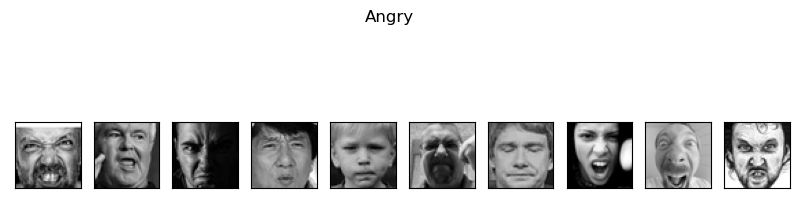

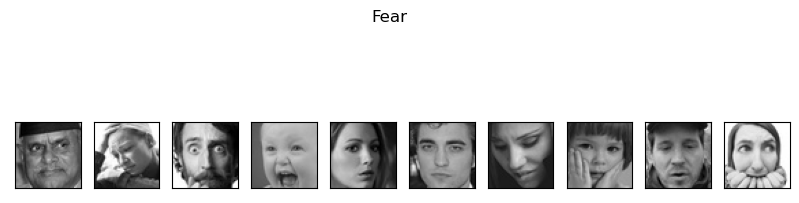

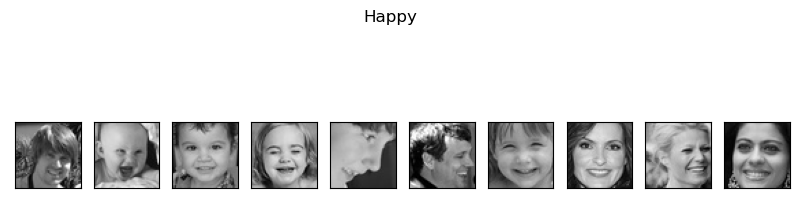

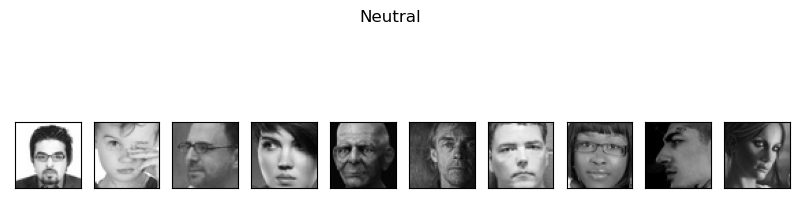

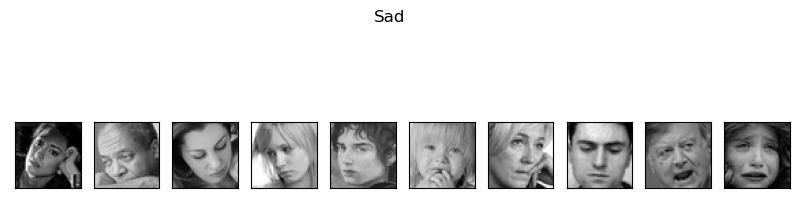

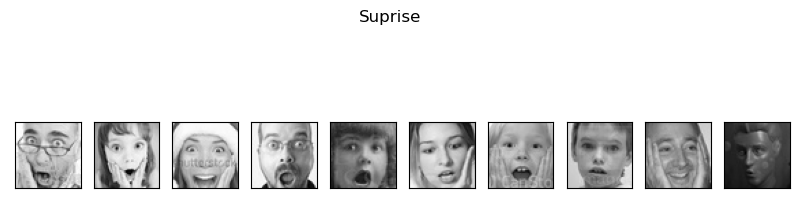

In [50]:
plot_samples(X, y, labels, 10)

### Reshaping the Data

In [51]:
X = np.reshape(X,(28273, 48*48*3))
X_valid = np.reshape(X_valid,(7067,48*48*3))

In [52]:
X.ndim

2

In [54]:
X.shape

(28273, 6912)

### PCA with 6912 components

In [55]:
from sklearn.decomposition import PCA

pca_6912 = PCA(n_components=6912)
X_pca6912 = pca_6912.fit_transform(X)

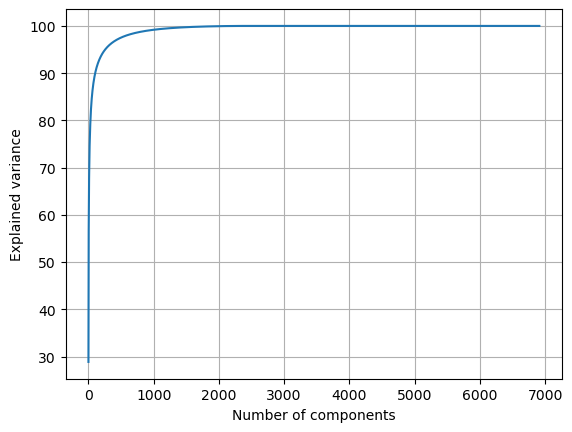

In [56]:
plt.grid()
plt.plot(np.cumsum(pca_6912.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

In [57]:
X_pca6912.shape

(28273, 6912)

### PCA with 1000 components

In [58]:
from sklearn.decomposition import PCA

pca_1000 = PCA(n_components=1000)
X_pca1000 = pca_1000.fit_transform(X)

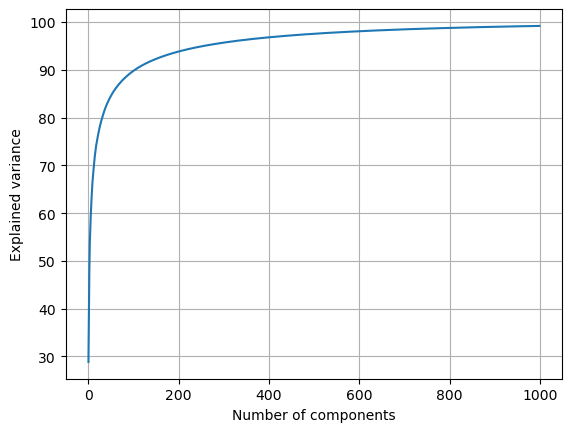

In [59]:
plt.grid()
plt.plot(np.cumsum(pca_1000.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

In [60]:
X_pca1000.shape

(28273, 1000)

### PCA with 2304 components

In [66]:
from sklearn.decomposition import PCA

pca_2304 = PCA(n_components=2304)
X_pca2304 = pca_2304.fit_transform(X)
X_valid_pca2304 = pca_2304.fit_transform(X_valid)

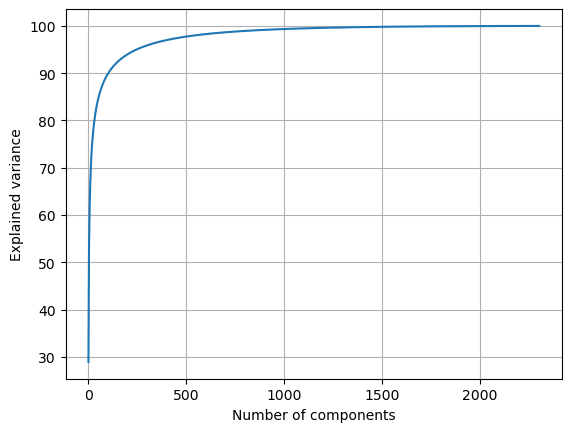

In [67]:
plt.grid()
plt.plot(np.cumsum(pca_2304.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

In [63]:
X_pca2304.shape

(28273, 2304)

In [53]:
y.shape

(28273,)

### Applying K-SVM 

### Splitting the Data into train and test

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.30,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(19791, 6912)
shape of X Test :(8482, 6912)
shape of Y Train :(19791,)
shape of Y Test :(8482,)


In [18]:
#for this_C in [1,5,10,25,50,100]:
 #   clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,Y_train)
  #  clf3train = clf3.score(X_train,Y_train)
   # clf3test  = clf3.score(X_test,Y_test)
    #print("SVM for Non Linear \n C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_C,clf3train,clf3test))

### K-SVM for C=1

In [19]:
clf = SVC(kernel='rbf',C=1).fit(X_train,Y_train)

In [20]:
clf3train = clf.score(X_train,Y_train)

In [21]:
print(clf3train)

0.6256379162245466


In [22]:
clf3test = clf.score(X_test,Y_test)

In [23]:
print(clf3test)

0.44034425842961566


### K-SVM for C=10

In [26]:
clf2 = SVC(kernel='rbf',C=10).fit(X_train,Y_train)

In [27]:
clf2train = clf2.score(X_train,Y_train)
clf2test = clf2.score(X_test,Y_test)
print(clf2train)

0.9829215299883786


In [28]:
print(clf2test)

0.45649610940815843


### Predicting the x-test 

In [84]:
y2 = clf2.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(Y_test,y2))

Accuracy on unknown data is 0.45649610940815843


### result of Training Dataset

In [88]:
result = pd.DataFrame({'original' : Y_test,'predicted' : y2})

In [89]:
result

,original,predicted
0,5,5
1,4,4
2,0,1
3,4,0
4,1,4
...,...,...
8477,3,2
8478,2,2
8479,2,3
8480,4,1


### Validating with the test dataset

In [90]:
clf_valid = clf2.score(X_valid, y_valid)
print(clf_valid)

0.45224281873496536


In [91]:
y2_valid = clf2.predict(X_valid)

In [92]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_valid,y2_valid))

Accuracy on unknown data is 0.45224281873496536


### result of Validated/Testing data

In [93]:
result = pd.DataFrame({'original' : Y_test,'predicted' : y2})
result

,original,predicted
0,5,5
1,4,4
2,0,1
3,4,0
4,1,4
...,...,...
8477,3,2
8478,2,2
8479,2,3
8480,4,1


### Checking out PCA Data

In [72]:
#X_tt, y_tt, test_labels = load_data(TEST_DIR, IMG_SIZE)
print("shape of X Test :"+str(X_pca2304.shape))
print("shape of Y Train :"+str(y.shape))
print("shape of X Test :"+str(X_valid_pca2304.shape))
print("shape of Y Train :"+str(y_valid.shape))

shape of X Test :(28273, 2304)
shape of Y Train :(28273,)
shape of X Test :(7067, 2304)
shape of Y Train :(7067,)


### Splitting the Training data into train and test 

In [96]:
X_train,X_test,Y_train,Y_test = train_test_split(X_pca2304,y,test_size=.30,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(19791, 2304)
shape of X Test :(8482, 2304)
shape of Y Train :(19791,)
shape of Y Test :(8482,)


### K-SVM with pca_data

In [77]:
clf_pca = SVC(kernel='rbf',C=10).fit(X_train,Y_train)

In [78]:
clftrain_pca = clf_pca.score(X_train,Y_train)
print(clftrain_pca)

0.9869132433934616


### Predicting the X_test

In [97]:
y2_pca = clf_pca.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(Y_test,y2_pca))

Accuracy on unknown data is 0.45637821268568735


### result of X_test 

In [99]:
result = pd.DataFrame({'original' : Y_test,'predicted' : y2_pca})
result

,original,predicted
0,5,5
1,4,4
2,0,1
3,4,0
4,1,4
...,...,...
8477,3,2
8478,2,2
8479,2,3
8480,4,1


### Validation with Test Data

In [79]:
clf_valid_pca = clf_pca.score(X_valid_pca2304, y_valid)
print(clf_valid_pca)

0.1785764822414037


In [101]:
y2_valid_pca = clf_pca.predict(X_valid_pca2304)

In [102]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_valid,y2_valid_pca))

Accuracy on unknown data is 0.1785764822414037


### Result of Validation data 

In [105]:
result_pca = pd.DataFrame({'original' : Y_test,'predicted' : y2})
result_pca

,original,predicted
0,5,5
1,4,4
2,0,1
3,4,0
4,1,4
...,...,...
8477,3,2
8478,2,2
8479,2,3
8480,4,1
